---
# *Sistema de Recomendación - MACHINE LEARNING*
---

In [1]:
# Librerias a utilizar
from google.colab import drive
import pandas as pd
import numpy as np
import json
import pyarrow.parquet as pq

In [2]:
# Establece conexión con google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Copio la ruta del archivo para poder leerlo:
metadata_sitios = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Datos proceados/metadata_sitios/metadata_procesado.parquet'

In [4]:
# llamo al archivo con una variable para que lo lea en el formato correspondiente:
metadata = pd.read_parquet(metadata_sitios)

In [5]:
# Llamo al dataframe
metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,state
0,Pizza Hut,"Pizza Hut, 14431 Culver Dr, Irvine, CA 92604",0x80dcdc5fac2a2035:0x1b43e165067c8544,Family-friendly chain known for its made-to-or...,33.706555,-117.788129,"'Pizza restaurant', 'Chicken wings restaurant'...",2.8,78,CA
1,Giuseppes Pizzeria,"Giuseppes Pizzeria, 73850 CA-111 a, Palm Deser...",0x80dafe7cf3b9d4c5:0x55c34fadbcbc4d80,Smoked meats are paired with craft brews & cla...,33.721833,-116.376333,"'Pizza restaurant', 'Italian restaurant'",4.3,45,CA
2,Chick-fil-A,"Chick-fil-A, 400 E 2nd St Soltz Residence Hall...",0x89c5877b147c5149:0xe6ff5ec36cd61f8d,"Fast-food chain serving chicken sandwiches, st...",41.006429,-76.448820,"'Fast food restaurant', 'Breakfast restaurant'...",4.2,103,PA
3,Subway,"Subway, 425 E Avenida De Los Arboles, Thousand...",0x80e83022ee661153:0x5bb017090549dcc4,Casual counter-serve chain for build-your-own ...,34.218985,-118.869612,"'Sandwich shop', 'Caterer', 'Fast food restaur...",3.9,26,CA
4,Bella Rosa,"Bella Rosa, 4046 W Skippack Pike, Skippack, PA...",0x89c699a5bbf34d65:0xb0aec48423f33c4c,"Low-key, Ferrari-themed eatery at Hotel Fiesol...",40.224112,-75.401193,"'Italian restaurant', 'Bar'",4.6,48,PA
...,...,...,...,...,...,...,...,...,...,...
2318,Timeless - An MHK Eatery,"Timeless - An MHK Eatery, 90 Tamiami Trail N, ...",0x88dae1998c55ab59:0xca17304e181716b9,Chef-driven American small plates & pizzas pai...,26.148298,-81.795414,'American restaurant',4.3,158,FL
2319,Dragon City Bakery & Cafe,"Dragon City Bakery & Cafe, 2367 Mission St, Sa...",0x808f7e3c72d32ecf:0x1d763751efbe1d8b,"Tiny bakery for pastries, wedding cakes, bread...",37.759127,-122.418956,"'Bakery', 'Cafe', 'Chinese restaurant', 'Resta...",4.1,36,CA
2320,Just Fish & Grits,"Just Fish & Grits, 3300 N Pace Blvd #50, Pensa...",0x8890bf7407784bd7:0x99f22294e687e218,"Low-key joint dishing up fried tilapia, halibu...",30.448096,-87.238088,'Seafood restaurant',4.7,298,FL
2321,D Cuisine,"D Cuisine, 2723 N Clark St, Chicago, IL 60614",0x880fd3d0fe9ec503:0x7a7fb5027c23bebd,Trendy spot for creative Chinese dim sum & lar...,41.932084,-87.644375,'Chinese restaurant',4.5,138,IL


In [6]:
def expand_categories(df):
    # Lista para almacenar los resultados finales
    result_data = []

    # Iterar sobre cada fila del DataFrame original
    for index, row in df.iterrows():
        # Obtener el ID del negocio
        name = row['name']
        address = row['address']
        id = row['gmap_id']
        description = row['description']
        latitude = row['latitude']
        longitude = row['longitude']
        avg_rating = row['avg_rating']
        num_of_reviews = row['num_of_reviews']
        state = row['state']

        # Obtener las categorías de la fila y dividirlas por comas
        categories = row['category'].split(',')

        # Iterar sobre cada categoría y agregarla a la lista de resultados
        for category in categories:
            result_data.append({'name': name, 'address': address, 'gmap_id': id, 'description': description, 'latitude': latitude, 'longitude': longitude, 'category': category.strip(), 'avg_rating': avg_rating, 'num_of_reviews': num_of_reviews, 'state': state })

    # Crear un nuevo DataFrame a partir de la lista de resultados
    result_df = pd.DataFrame(result_data)

    return result_df

# Suponiendo que tienes un DataFrame llamado df con la columna 'category'

# Aplicar la función y obtener el resultado
result_df = expand_categories(df)

NameError: name 'df' is not defined

# **Veamos en un gráfico la cantidad de datos por estados:**

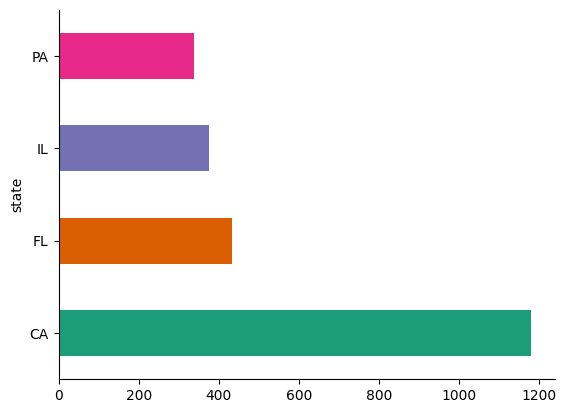

In [ ]:
# @title state

from matplotlib import pyplot as plt
import seaborn as sns
metadata.groupby('state').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Llamo archivos de YELP:
business = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Datos proceados/Yelp/business_procesado.parquet'
checkin = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Datos proceados/Yelp/checkin_procesado.parquet'
review = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Datos proceados/Yelp/review_procesado.parquet'
tip = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Yelp/tip.json'
user = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Yelp/user.parquet'

In [ ]:
# Abrimos los archivos en el formato correspondiente:
business_google = pd.read_parquet(business)
checkin_google = pd.read_parquet(checkin)
review_google = pd.read_parquet(review)
tip_google = pd.read_json(tip, lines=True)
user_google = pd.read_parquet(user)

In [ ]:
# Leemos los archivos:
business_google.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4,100,"Food, Delis, Italian, Bakeries, Restaurants"
2,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4,65,"Cocktail Bars, Bars, Italian, Nightlife, Resta..."


In [ ]:
# Mostramos las columnas relevantes
business_google[['business_id','name', 'state', 'stars', 'categories']]

,business_id,name,state,stars,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,CA,4,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,FL,4,"Food, Delis, Italian, Bakeries, Restaurants"
2,QdN72BWoyFypdGJhhI5r7g,Bar One,PA,4,"Cocktail Bars, Bars, Italian, Nightlife, Resta..."
3,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,PA,3,"Pizza, Restaurants, Salad, Soup"
4,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,PA,3,"Eatertainment, Arts & Entertainment, Brewpubs,..."
...,...,...,...,...,...
17021,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,CA,3,"Restaurants, Specialty Food, Food, Sandwiches,..."
17022,8n93L-ilMAsvwUatarykSg,Kitchen Gia,PA,3,"Coffee & Tea, Food, Sandwiches, American (Trad..."
17023,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,PA,4,"Fondue, Beer, Wine & Spirits, Food, Restaurants"
17024,w_4xUt-1AyY2ZwKtnjW0Xg,Bittercreek Alehouse,PA,4,"Bars, Gastropubs, Sandwiches, Nightlife, Resta..."


In [ ]:
# No tiene info relevante para nuestra APP
checkin_google.head(3)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27


---------------------------------------------------------------

In [ ]:
review_google.head(3)

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18


In [ ]:
review_google[['business_id','stars_review', 'text']]

,business_id,stars_review,text
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is..."
1,XQfwVwDr-v0ZS3_CbbE5Xw,2,This is the second time we tried turning point...
2,XQfwVwDr-v0ZS3_CbbE5Xw,4,The place is cute and the staff was very frien...
3,XQfwVwDr-v0ZS3_CbbE5Xw,3,We came on a Saturday morning after waiting a ...
4,XQfwVwDr-v0ZS3_CbbE5Xw,2,"Mediocre at best. The decor is very nice, and ..."
...,...,...,...
32987,YNAjAJFVqbbQsWBu10keGw,5,After checking out a couple of local one-of-ki...
32988,YNAjAJFVqbbQsWBu10keGw,3,"Cake was good, but $2.13 for a 6 oz cup of mil..."
32989,FSiPq3GSzHOch1axV8VCKA,4,Nice little bar. Literally has a blind dog in ...
32990,-v0JE4wW_4Xs6C3WT2XgDA,3,"It is what it is .......\nSafe, clean food.\nE..."


In [ ]:
tip_google.head(3)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0


In [ ]:
# No hay info relevante con las reseñas sino con los comentarios, podríamos ver si lo usamos o no. Recomiendo usar lo que tenemos con reseñas en estrellas directamente.
tip_google[['business_id','text']]

,business_id,text
0,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.
1,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...
2,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't
3,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken
4,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch
...,...,...
908910,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.
908911,OaGf0Dp56ARhQwIDT90w_g,Great food and service.
908912,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!
908913,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price


In [ ]:
user_google.head(3)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18


In [ ]:
user_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


In [ ]:
user_google[['user_id','useful','funny','cool','average_stars','compliment_cool']]

,user_id,useful,funny,cool,average_stars,compliment_cool
0,qVc8ODYU5SZjKXVBgXdI7w,7217,1259,5994,3.91,467
1,j14WgRoU_-2ZE1aw1dXrJg,43091,13066,27281,3.74,3131
2,2WnXYQFK0hXEoTxPtV2zvg,2086,1010,1003,3.32,119
3,SZDeASXq7o05mMNLshsdIA,512,330,299,4.27,26
4,hA5lMy-EnncsH4JoR-hFGQ,29,15,7,3.54,0
...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,74,9,6,2.98,0
2105593,tmelBbVBGAzXBVfH2u_R6g,14,5,2,3.68,0
2105594,tpBznnD6uJN3m_pJubj09w,4,1,2,3.85,0
2105595,Kst_srPw7GdYydMFYdCtzw,21,2,5,2.85,0


In [9]:
# Llamamos a los archivos de GOOGLE MAPS:
df_CA = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Datos proceados/google_reviews/df_procesado_CA.parquet'
df_FL = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Datos proceados/google_reviews/df_procesado_FL .parquet'
df_IL = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Datos proceados/google_reviews/df_procesado_IL (1).parquet'
df_PA = '/content/drive/MyDrive/Darío Aveiro/PF Darío Aveiro/Datos proceados/google_reviews/df_procesado_PA.parquet'

In [10]:
# Abrimos los archivos en el formato correspondiente:
df_CA = pd.read_parquet(df_CA)
df_FL = pd.read_parquet(df_FL)
df_IL = pd.read_parquet(df_IL)
df_PA = pd.read_parquet(df_PA)

In [ ]:
# Leemos los archivos: fijense que dice "estado" en español, hay incoherencia textual
df_CA.head(3)

,user_id,name,time,rating,text,gmap_id,estado
0,1.149879e+20,WestCoast Treats,2017-03-20 20:13:39.768,5,Aquatic pets galore!,0x808e33f6ae3b065f:0xa3878608799f8a45,CA
1,1.116541e+20,Angel Lainez,2018-11-04 16:58:52.294,4,Consistently good salad bar,0x808fc9ef013c4e1d:0x97089b5e7e3f9a89,CA
2,1.031786e+20,Matt Niehaus,2016-05-28 21:16:53.707,4,"Taste crepes. Good coffee, shaved ice, and es...",0x808fcc84e03b9acd:0xbbdc18c0e9c84381,CA


In [ ]:
# Mostramos las columnas relevantes
df_CA[['user_id','name','estado','rating','text']]

,user_id,name,estado,rating,text
0,1.149879e+20,WestCoast Treats,CA,5,Aquatic pets galore!
1,1.116541e+20,Angel Lainez,CA,4,Consistently good salad bar
2,1.031786e+20,Matt Niehaus,CA,4,"Taste crepes. Good coffee, shaved ice, and es..."
3,1.080744e+20,Timothy Proschold,CA,5,Love this Peet’s! Great location in the Pruney...
4,1.117459e+20,Juan Orosco,CA,3,Good selection but overprice
...,...,...,...,...,...
306114,1.152659e+20,Maria Pisano,CA,5,Food and service is amazing! Decor is excellent!
306115,1.016346e+20,Agape,CA,5,We had the best care and experience with Dr. N...
306116,1.076032e+20,Garnet Hazen,CA,5,Beautiful!!
306117,1.025580e+20,Gregg Anthony,CA,4,One of the better Westfield malls I have been ...


In [ ]:
df_FL.head(3)

,user_id,name,time,rating,text,gmap_id,estado
0,1.115104e+20,nope nope,2020-03-09 14:37:35.109,5,Great bar and live music!,0x88e77aeb1ff0c1e5:0x79a6131766b85874,FL
1,1.003621e+20,Felix Munguia,2018-07-10 14:50:17.817,5,F DJ kids if XD TV no I'd cute us RJ😘if ur fi ...,0x88dd6b55a3130521:0x46f1b10e395264c5,FL
2,1.065374e+20,Sheyling Vegas,2020-01-18 05:47:58.413,5,(Translated by Google) Excellent attention and...,0x88d9c0517c376183:0x865b60f41bcd7eb7,FL


In [ ]:
df_FL[['user_id','name','estado','rating', 'text']]

,user_id,name,estado,rating,text
0,1.115104e+20,nope nope,FL,5,Great bar and live music!
1,1.003621e+20,Felix Munguia,FL,5,F DJ kids if XD TV no I'd cute us RJ😘if ur fi ...
2,1.065374e+20,Sheyling Vegas,FL,5,(Translated by Google) Excellent attention and...
3,1.085252e+20,Cristiana Torres,FL,5,(Translated by Google) Mandatory stop!!! For a...
4,1.182339e+20,Phil Reid,FL,5,Driver did excellent job
...,...,...,...,...,...
354354,1.166834e+20,"Donald Gibson, Jr.",FL,3,"Nice selection of budget products, especially ..."
354355,1.130881e+20,Larry E. Carlton,FL,5,Great organization.
354356,1.091880e+20,maritza abdala,FL,5,Nice
354357,1.048999e+20,ivette morales-cruz,FL,4,(Translated by Google) I like\n\n(Original)\nM...


In [ ]:
df_IL.head(3)

,user_id,name,time,rating,text,gmap_id,estado
0,1.133656e+20,Keerthi Madapusi,2015-08-12 19:14:45.111,5,You cannot find a more serene place in the cit...,0x880fd2e557a0fec9:0xe8ad559c597f7323,IL
1,1.037694e+20,Jason&Wifey “domo” Marine,2017-10-11 19:01:50.249,5,It was a nice sized store the employees helped...,0x887728b4793b5e31:0x842f68fa95df76a6,IL
2,1.162541e+20,Mary Christenson,2020-07-12 12:45:42.676,4,Long walk from car,0x880fcb47f01e3137:0x1e48ad03093b95f4,IL


In [ ]:
df_IL[['user_id','name','estado','rating', 'text']]

,user_id,name,estado,rating,text
0,1.133656e+20,Keerthi Madapusi,IL,5,You cannot find a more serene place in the cit...
1,1.037694e+20,Jason&Wifey “domo” Marine,IL,5,It was a nice sized store the employees helped...
2,1.162541e+20,Mary Christenson,IL,4,Long walk from car
3,1.047130e+20,IqBf Traders Inc,IL,1,"No parking horrible customer service, nasty an..."
4,1.070545e+20,Crooked Marc,IL,5,Great iced coffee!
...,...,...,...,...,...
237725,1.068532e+20,Binah Gabriela Vieira Cortez El,IL,1,Suggestive advice: If and you are planning a c...
237726,1.106980e+20,Behemoth D,IL,4,Awesome place. That was 2nd time for me and m...
237727,1.072078e+20,Jeff _,IL,5,Always great food. We've been going here for o...
237728,1.086288e+20,Frankie Escalona,IL,5,Really well done layout and the staff are very...


In [ ]:
df_PA.head(3)

,user_id,name,time,rating,text,gmap_id,estado
0,1.165900e+20,Robert Watson,2020-02-01 23:15:55.672,5,My granddaughter won't eat pizza from anywhere...,0x89cb7276a4aa3cd7:0xa018104b74d502f9,PA
1,1.087678e+20,Pamela Phipps Way Phipps Way,2018-06-05 03:14:38.880,5,This garage is 👍,0x88328dd55afc3711:0x2b8778383257b3df,PA
2,1.027311e+20,Penny Singer,2019-10-05 02:27:39.580,5,Usually cheaper gas prices,0x89c5395cc889b793:0xea3f1236dadf2c95,PA


In [ ]:
df_PA[['user_id','name','estado','rating', 'text']]

,user_id,name,estado,rating,text
0,1.165900e+20,Robert Watson,PA,5,My granddaughter won't eat pizza from anywhere...
1,1.087678e+20,Pamela Phipps Way Phipps Way,PA,5,This garage is 👍
2,1.027311e+20,Penny Singer,PA,5,Usually cheaper gas prices
3,1.182369e+20,Eric Becchetti,PA,4,Nice ppl
4,1.067024e+20,Sharon Thompson,PA,5,Friendly service and great food
...,...,...,...,...,...
271471,1.093270e+20,Salam Majeed,PA,5,Clean and many store choice s
271472,1.155043e+20,Tom Mergo,PA,5,I would like to thank everyone at effort unite...
271473,1.133066e+20,Dolly Khanom,PA,5,Nice
271474,1.071475e+20,Emily B,PA,5,"Really personable employees, really good price..."


# ------------------------------------------------------------

In [ ]:
# Carguen el DataFrame unificado con los datos
data = pd.read_csv('.csv')  # Asegúrate de cambiar el nombre del archivo

# Filtra las reseñas con calificaciones de 4 y 5 estrellas? ¿no era por mas de 20 reseñas?
positive_reviews = data[data['avg_rating'].isin([4, 5])]

# mostramos las columnas relevantes
relevant_columns = ['state', 'description', 'avg_rating', 'text', 'name']
positive_reviews = positive_reviews[relevant_columns]

# Muestra las primeras filas del DataFrame resultante
print(positive_reviews.head())

In [16]:
!pip install nltk pandas

# Hace la aplicación de análisis de sentimiento más eficiente:
!pip install swifter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=8764e0a9ca3dbe09ceea38eb62dd3a9e68f27a38cef4a4b694ef8d2486d07c60
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [17]:
import pandas as pd
import nltk
import swifter
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Concatenamos los df y creamos un único dataframe para trabajar mejor
df_estados = pd.concat([df_CA, df_PA, df_IL, df_FL], ignore_index=True)

In [12]:
# Creamos la instancia para el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

In [13]:
# Creamos la función para analizar el sentimiento:
def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 2  # Positivo
    elif compound_score <= -0.05:
        return 0  # Negativo
    else:
        return 1  # Neutro

In [22]:
# Definimos una función para obtener el sentimiento:
# Función para obtener el sentimiento y etiquetas de un texto
def get_sentiment_info(text):
    sentiment_scores = sia.polarity_scores(text)
    sentiment_label = get_sentiment_label(sentiment_scores['compound'])
    return sentiment_scores['compound'], sentiment_label


In [23]:
# Muestreo aleatorio del 20% del DataFrame original
df_muestra = df_estados.sample(frac=0.2, random_state=42)

# Filtrar por estado
estado_deseado = 'CA'
df_estado = df_estados[df_estados['estado'] == estado_deseado]

# Aplicar la función de análisis de sentimiento a la columna 'text' de manera paralela en el DataFrame filtrado
df_estado[['sentiment_scores', 'sentiment_label']] = df_estado['text'].swifter.apply(lambda text: pd.Series(get_sentiment_info(text)))

# Ordenar por puntaje de sentimiento en orden descendente para obtener las recomendaciones
df_estado_recomendaciones = df_estado.sort_values(by='sentiment_scores', ascending=False)

Pandas Apply:   0%|          | 0/306119 [00:00<?, ?it/s]

<ipython-input-23-a3762edfe4eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estado[['sentiment_scores', 'sentiment_label']] = df_estado['text'].swifter.apply(lambda text: pd.Series(get_sentiment_info(text)))
<ipython-input-23-a3762edfe4eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estado[['sentiment_scores', 'sentiment_label']] = df_estado['text'].swifter.apply(lambda text: pd.Series(get_sentiment_info(text)))


In [24]:
# Mostrar las recomendaciones
print(f"Recomendaciones para el estado {estado_deseado}:\n", df_estado_recomendaciones[['text', 'sentiment_scores', 'sentiment_label']])

Recomendaciones para el estado CA:
                                                      text  sentiment_scores  \
131808  I was searching for the best orthodontic offic...            0.9996   
134080  Tea Lyfe is a boba shop and has two locations....            0.9996   
90392   DETAILED ACCOUNT - should give 5 stars but the...            0.9993   
29746   Delicious, tingly sparking water. That's how I...            0.9993   
45806   The Studio brought back memories for me all th...            0.9993   
...                                                   ...               ...   
10396   This place is terrible. I have tried to work w...           -0.9961   
77158   I rented a car from them a while back, and the...           -0.9964   
33070   Last Wednesday, I went into Sherman Oaks Hospi...           -0.9970   
91008   Avoid these apartments at all costs! I can hon...           -0.9973   
227352  My experience with Palm Springs police has bee...           -0.9974   

        sentime

In [27]:
from IPython.display import display

# Mostrar solo la columna de análisis de sentimiento
display(df_estado_recomendaciones[['text', 'sentiment_label']])


,text,sentiment_label
131808,I was searching for the best orthodontic offic...,2.0
134080,Tea Lyfe is a boba shop and has two locations....,2.0
90392,DETAILED ACCOUNT - should give 5 stars but the...,2.0
29746,"Delicious, tingly sparking water. That's how I...",2.0
45806,The Studio brought back memories for me all th...,2.0
...,...,...
10396,This place is terrible. I have tried to work w...,0.0
77158,"I rented a car from them a while back, and the...",0.0
33070,"Last Wednesday, I went into Sherman Oaks Hospi...",0.0
91008,Avoid these apartments at all costs! I can hon...,0.0
